In [36]:
import cfdnetplus
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [46]:
fields= ['U','p','k','omega', 'nut']
mainfolder='airfoil2d/airFoil_450_ssim_small0/'

xlim =[-30,30]
ylim = [-20 , 20]
xres=256
yres=66
zcut=0.05

In [47]:
cfdnetplus.extractInput2d(mainfolder,fields, xlim, ylim,xres,yres,zcut)

airfoil2d/airFoil_450_ssim_small0/
airFoil_450_ssim_small_0
write airfoil2d/airFoil_450_ssim_small0//input.npy


In [48]:
data=np.load(mainfolder+'/input.npy')

In [49]:
modelfolder='cfdnetplus_models/model_ssim_smalldomain/'
model = tf.keras.models.load_model(modelfolder,compile=False)
normal=np.load(modelfolder+'/normal.npy')  

In [50]:
data=data*1/normal

In [51]:
prediction=model.predict(data)
prediction=prediction*normal
np.save(mainfolder+'/pred',prediction)

1/1 [==============================] - 0s 107ms/step


In [52]:
print(normal)

[[[[4.40372151e+03 4.40372151e+03 4.40372151e+03 7.14774436e+07
    2.74827577e+05 1.84771477e+04 4.82622531e+01]]]]


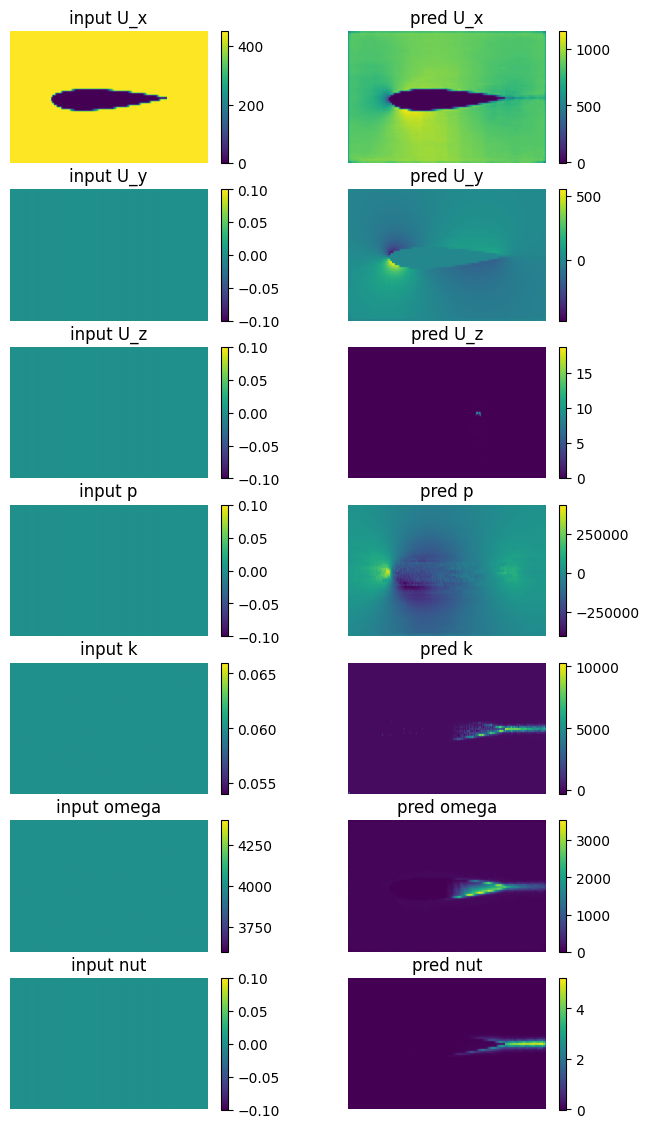

In [53]:
pred=np.load(mainfolder+'/pred.npy')
data=data*normal
n=0
fig = plt.figure(figsize=(8, 14))
[a,b,c,d]=data.shape
titles= ['U_x','U_y','U_z','p','k','omega', 'nut']

for i in range(d):
    fig.add_subplot(d, 2, i*2+1)
    plt.imshow(data[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('input ' +titles[i])
    plt.axis('off')
    plt.colorbar()
    
    fig.add_subplot(d, 2, i*2+2)
    plt.imshow(pred[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('pred '+titles[i])
    plt.axis('off')
    plt.colorbar()
    #print(i)

plt.show()

In [55]:
cfdnetplus.pred2OF2D(mainfolder,fields,xlim,ylim)

airFoil_450_ssim_small0_0
folder airfoil2d/airFoil_450_ssim_small0//1 was created
write airfoil2d/airFoil_450_ssim_small0//1/U
write airfoil2d/airFoil_450_ssim_small0//1/p
write airfoil2d/airFoil_450_ssim_small0//1/k
write airfoil2d/airFoil_450_ssim_small0//1/omega
write airfoil2d/airFoil_450_ssim_small0//1/nut
